<img style="float: right;width: 100px" src="https://www.enib.fr/images/logo-enib-accueil.jpg">

<div>
    <p><h3>Traitement du signal (S6)</h3></p>
    <p><span class="badge badge-danger" style="background-color:#dc3545">TP2</span> <span class="badge badge-info">2021</span></p>
</div>

<div style="text-align: center;padding-bottom:20px;padding-top:10px">
    <h1>TP2</h1>
    <h2>Echantillonnage et quantification</h2>
</div>

Pour générer et représenter les signaux, nous allons utiliser le module `numpy` (gestion des tableaux), le module `matplotlib` (affichage) et quelques fonctions de `scipy`.

In [1]:
from numpy import *
from scipy.signal import resample
from matplotlib.pyplot import *
from IPython.display import Audio
from ipywidgets import interact
from numpy.fft import *

### Exercice 1 : Suréchantillonnage pour l’impression visuelle

L’oeil est un mauvais interpolateur au sens de la restitution de Shannon. Pour améliorer l’aspect visuel d’un signal échantillonné, on va devoir suréchantillonner (aller au-delà de la fréquence de Shannon). Considérons une sinusoïde définie par le modèle mathématique :

$$x(t)=3 \sin(2\pi f_0 t)$$

avec $f_0=80$ Hz. Selon le théorème de Shannon, la fréquence d’echantillonnage doit être supérieure à $\nu_e=160$Hz.

**Question :** Sous Python, synthétiser le signal $x(t)$ en utilisant une fréquence d'échantillonnage de $\nu_e=200$ Hz. Représenter alors le signal en utilisant la commande `plot`. 

Text(0.5, 0, 't')

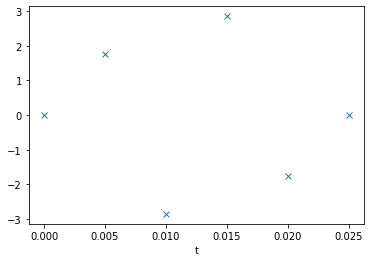

In [2]:
f0 = 80
ve = 200
t = arange(0, 30*10**(-3), 1/ve)

x = 3*sin(2*pi*f0*t)

plot(t, x, "x")
xlabel("t")

Pour affiner la représentation du signal, nous proposons de le suréchantillonner en utilisant une fréquence d'échantillonnage de $\nu_e=1000$ Hz.

**Question :**  Sous Python, synthétiser le signal $x(t)$ en utilisant une fréquence d'échantillonnage de $\nu_e=1000$ Hz. Superposez alors, sur la même figure, la sinusoïde échantillonnée à $\nu_e=200$Hz et celle échantillonnée à $1000$ Hz.


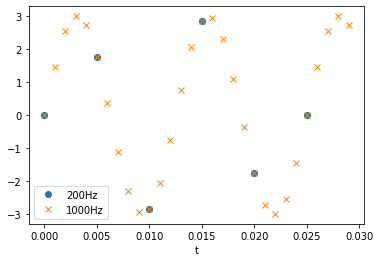

In [3]:
ve = 1000
t2 = arange(0, 30*10**(-3), 1/ve)
x2 = 3*sin(2*pi*f0*t2)

plot(t, x, "o", label="200Hz")
plot(t2, x2, "x", label="1000Hz")
xlabel("t")
legend()

### Exercice 2 : Théorème d’échantillonnage

Dans cet exercice, on propose de reconstruire un signal numérique $x[n]$ en utilisant la fonction numpy `resample` (voir <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html">Documentation</a>)

**Question :** Ecrire une fonction Python nommée `show_reconstruction` qui :

* affiche une sinusoïde analogique $x(t)$ de fréquence $200$ Hz et d'amplitude crête unitaire sur une durée de $80$ ms.
* affiche les 20 premiers échantillons $x[n]=x(nT_e)$ prélevés à la fréquence d'échantillonnage $\nu_e=\frac{1}{T_e}$ Hz.
* affiche le signal reconstruit à partir de la fonction `resample(x,N)` avec `N=30*len(x)`.

<div class="alert alert-info">Pour synthétiser une sinusoïde analogique, on pourra simplement fixer la fréquence d'échantillonnage à une valeur très élévée.</div>

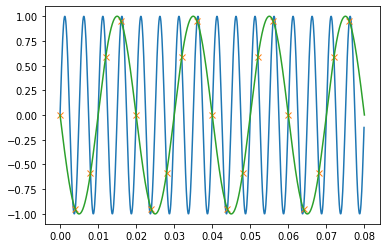

In [4]:
def show_reconstruction():
    f0 = 200
    ve = 250
    t = arange(0,80*10**(-3), 1/10000)
    x = sin(2*pi*f0*t)
    plot(t, x)
    
    t2 = arange(0,80*10**(-3), 1/ve)
    x2 = sin(2*pi*f0*t2)
    
    plot(t2[:20], x2[:20],"x")
    
    f = resample(x2, 30*len(x))
    t2 = linspace(0,80*10**(-3), len(f))
    plot(t2, f)

show_reconstruction()    

**Question :** On échantillonne un signal cosinus de fréquence $200$ Hz à la fréquence d'échantillonnage $\nu_e = 650$ Hz. Quel signal obtient-on lors d’une reconstruction ?

le même

**Question :** Même question lorsque la fréquence d'échantillonnage est fixée à $\nu_e = 250 $ Hz.

pas le même

### Exercice 3 : Entendre le repliement

Dans cet exercice, on propose d'illustrer de manière sonore le phénomène de repliement. Pour illustrer ce phénomène, nous allons échantillonner une sinusoïde $x(t)$ de fréquence $1000$Hz à différentes fréquences d'échantillonnage $\nu_e$ et comparer le résultat. 

<div class="alert alert-info">
La lecture d'un son en python s'obtient via l'instruction Audio(s,rate=nu_e) où s désigne le signal numérique et nu_e la fréquence d'échantillonnage.
</div>

**Question :** Ecrire une liste d'instructions python pour :
* synthétiser le signal sinusoïdal $x(t)$ à la fréquence d'échantillonnage $\nu_e$.
* écouter le signal audio $x(t)$ avec la fonction `Audio`

Tester votre programme pour les fréquences d'échantillonnage suivantes: $\nu_e=1500$ Hz, $\nu_e=5000$ Hz et $\nu_e=20000$ Hz. Interpréter les résultats obtenus.

In [5]:
f0 = 1000
ve = 5000
t = arange(0, 5, 1/ve)
x = sin(2*pi*f0*t)

framerate = 44100
Audio(x, rate=framerate)

In [6]:
Fe = 44100
t = arange(0,2,1/Fe)
x = sin(2*pi*440*t)+0.1*sin(2*pi*440*2*t)+0.7*sin(2*pi*440*2*2*t)+0.7*sin(2*pi*440*2*2*2*t)
Audio(x,rate=Fe)

### Exercice 4 : 

Dans cette partie nous allons utiliser les effets spectraux de l'échantillonnage pour déterminer la fréquence maximale contenue dans le spectre d’un signal analogique.
Soit le signal analogique $s(t) = sinc^2(200\pi t)$. Vous pouvez visualiser le spectre de ce signal échantillonné à la fréquence d'échantillonnage $f_e$ en lancant la fonction `show_spectrum_s`

In [7]:
from tools import specdet1

def show_spectrum_s(fe):
    t=np.arange(-1,1,1/fe);
    s=sinc(200*t)**2;
    N=len(s)
    specdet1(s,N);

**Question :** Commencer par `fe = 1000` Hz, puis baissez progressivement `fe`. Expliquez vos résultats.

In [8]:
interact(show_spectrum_s,fe=(100,2000,10));
#on peut descendre jusqu'à 400hz après on ne respecte plus Shanon et il y a du recouvrement spectral
#si on arrive sur un mltiple comme 100 ou 200 le signal apparait comme continu car on loupe toutes les fréquences 

interactive(children=(IntSlider(value=1050, description='fe', max=2000, min=100, step=10), Output()), _dom_cla…

**Question :** A partir de quelle fréquence d'échantillonnage on observera le recouvrement spectral ? Par la simulation, comment peut-on trouver la fréquence maximale, $f_{max}$, contenue dans le spectre de $s(t)$ ?

#200Hz 
#pour la retrouver il faut diviser par 2 la fréquence à laquelle on commence à retrouver le chauvauchement spectral

### Exercice 5 : Erreur de quantification

Dans cet exerice, on souhaite vérifier les résultats de l’étude théorique du bruit de quantification. Plus spécifiquement, on propose de générer un signal sinusoïdal de fréquence $100$Hz et d'amplitude crête unitaire que nous allons quantifier sur un nombre fini de valeurs.

**Question :** Ecrire un script Python qui :

1. numérise un signal cosinus `s1`, d’amplitude unitaire, d’une durée de $20$ms, de fréquence $\nu=100$ Hz, échantillonné à $\nu_e=10000$ Hz.
2. afin de simuler la quantification, multiplie `s1` par 5, réalise un arrondi au plus proche entier (utiliser la fonction `around`), puis divise le résultat par 5 pour obtenir le signal quantifié `s2`.
3. représente `s1` et `s2` sur le même graphe.
4. représente `error = s2 − s1`, le bruit (l'erreur) de quantification sur une autre figure. De cette
représentation en déduire une estimation de $q_0$ le quantum (pas de quantification).
5. calcule la moyenne (fonction `mean`) et la variance (fonction`var`) de l’erreur de
quantification.
6. compare la variance de l'erreur quantification avec sa valeur théorique ($\sigma_g^2=q_0^2/12$).


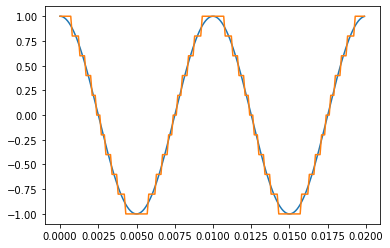

In [9]:
Fe = 10000
t = arange(0,0.02,1/Fe)
s1 = 1*cos(2*pi*100*t)
x1 = s1*5
x2 = around(x1)
s2 = x2/5
error = s2-s1
plot(t,s1)
plot(t,s2)

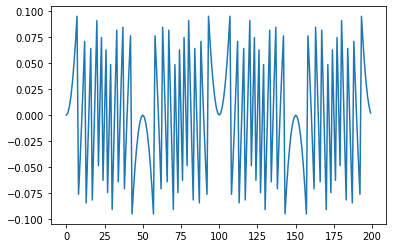

In [10]:
plot(error)

In [11]:
#l'erreur max est 0.1 donc le q doit etre de 0.2

In [12]:
moyenne  = mean(error)
variance = var(error)
print(moyenne,variance)

-6.716849298982197e-17 0.0029216599786587093


In [13]:
vari = (0.2**2)/12
vari = sqrt(vari)
print (vari)

0.05773502691896258
